# Data Exploration and Cleaning:
    -  Univariable study of target and features (Continuous & Categorical features, separately)
    -  Multivariate study of target and features
    -  Testing the statistical assumptions: Normality, Homoscedasticity, etc.
    -  Basic cleaning: Outliers, Missing data, Duplicate values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train.csv')
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df['Age'].value_counts().sort_index()

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

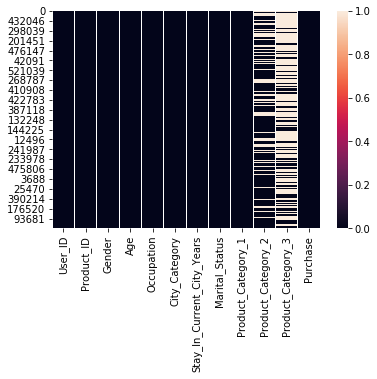

In [6]:
# To detect and see the Missing Values:
sns.heatmap(df.isnull())
df.isnull().sum()

In [7]:
df_selected=df.drop(['Product_Category_2', 'Product_Category_3'], axis=1)

In [8]:
# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

for i in ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']:
    encode_text_index(df, i)

In [9]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422


In [10]:
# Continuous & Categorical variables:
L_cat=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']
L_con=[]

______________________________________________________________________
variable name:  Purchase 

Statistical description: 
count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

Skewness =  0.6001400037087128
Kurtosis =  -0.3383775655851702


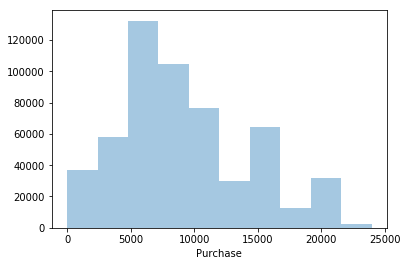

In [11]:
# Univariate analysis of Continuous varaibles: Statistical description (mean, std, skewness, Kurtosis) & Distribution plots
# of each continuous variable 
L=[]
for i in ['Purchase']:
    print('_'*70 )
    print('variable name: ', i, '\n')
    
    print('Statistical description: \n', df[i].describe(), '\n', sep='')
    
    if df[i].min()==0: 
        L.append(i)
    
    print("Skewness = ", df[i].skew())
    print("Kurtosis = ", df[i].kurt())
    
    sns.distplot(df[i], kde=False, bins=10)
    plt.show()

______________________________________________________________________
variable name:  Purchase


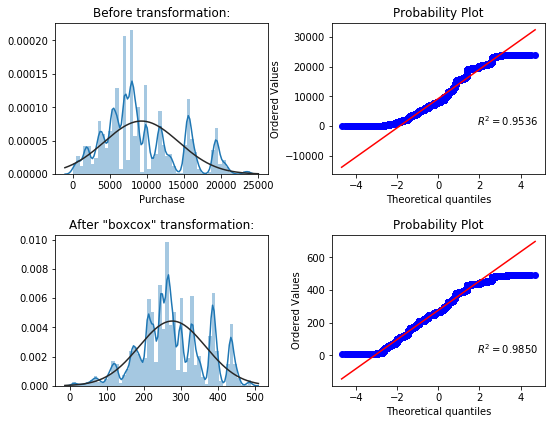

In [12]:
# To test the Statistical Assumptions on Continuous variables: We Check if our data meets the assumptions reuired by most mutivariate techniques _________
for i in ['Purchase']:
    print('_'*70 )
    print('variable name: ', i)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax1 = fig.add_subplot(221)
    ax1=sns.distplot(df[i], fit=stats.norm)
    ax1.set_title('Before transformation:')
    
    ax2 = fig.add_subplot(222)
    res=stats.probplot(df[i], plot=ax2, rvalue=True)
    
    b=0
    if i in L:
        b=0.1
    
    ax3 = fig.add_subplot(223)
    ax3=sns.distplot(stats.boxcox(b+df[i])[0], fit=stats.norm)
    ax3.set_title('After "boxcox" transformation:')
    
    ax4 = fig.add_subplot(224)
    res=stats.probplot(stats.boxcox(b+df[i])[0], dist=stats.norm, plot=ax4, rvalue=True)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)
    plt.show()

______________________________________________________________________
variable name:  Gender


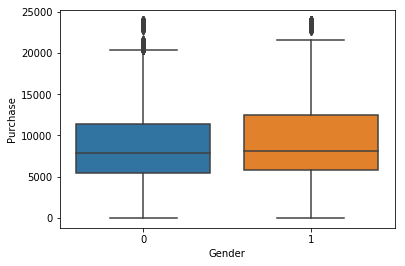

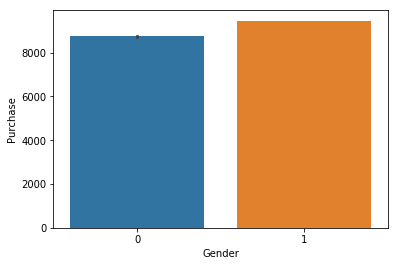

______________________________________________________________________
variable name:  Age


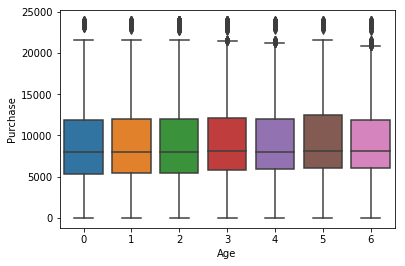

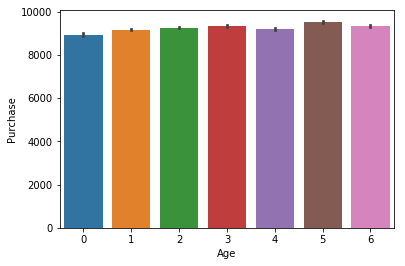

______________________________________________________________________
variable name:  Occupation


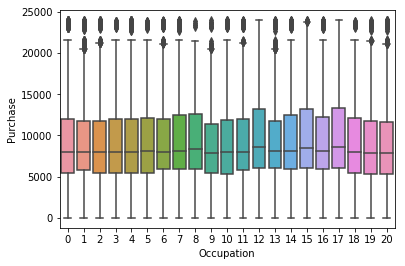

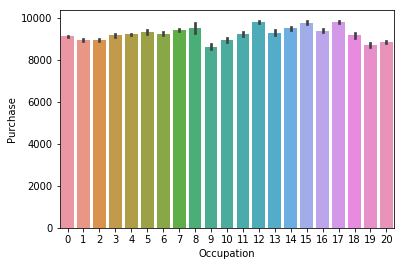

______________________________________________________________________
variable name:  City_Category


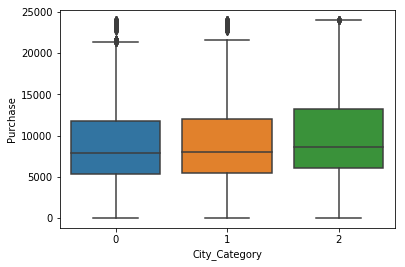

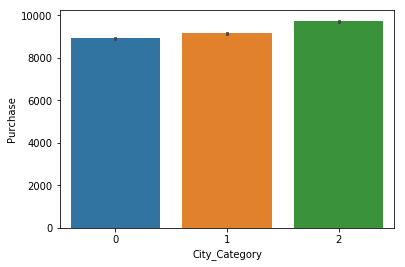

______________________________________________________________________
variable name:  Stay_In_Current_City_Years


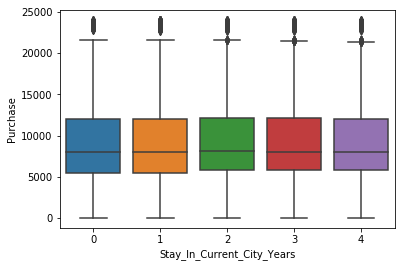

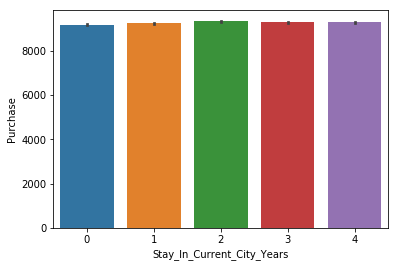

______________________________________________________________________
variable name:  Marital_Status


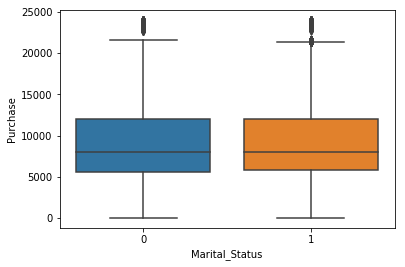

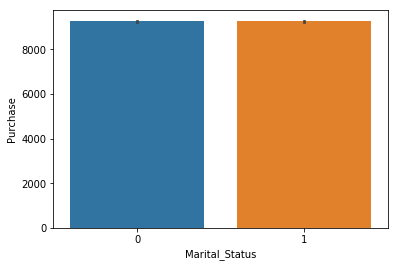

______________________________________________________________________
variable name:  Product_Category_1


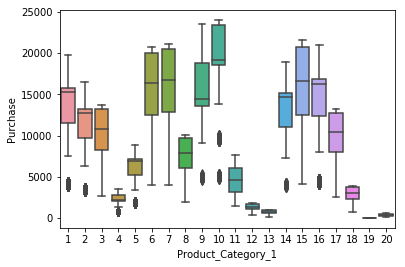

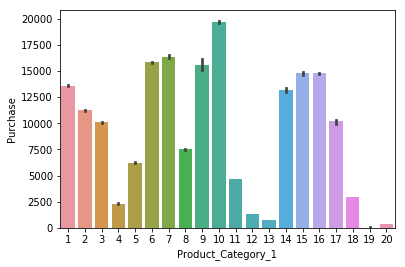

In [13]:
# Multivariable analysis of Categorical features: Boxplot & Barplot of target for different categories
for i in ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']:
    print('_'*70 )
    print('variable name: ', i)
    
    sns.boxplot( x=i, y='Purchase', data=df)
    plt.show()
    
    sns.barplot( x=i, y='Purchase', data=df)
    plt.show()